<a href="https://colab.research.google.com/github/plaban1981/HACKEREARTH/blob/master/HackerEarth_Machine_Learning_Challenge_Exhibit_Art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement : Predict the cost to ship the sculptures

**Task**

You work for a company that sells sculptures that are acquired from various artists around the world. Your task is to predict the cost required to ship these sculptures to customers based on the information provided in the dataset.

https://www.kaggle.com/imsparsh/hackerearth-ml-exhibit-a-rt-w-ensembles-92

**Data description**

The dataset folder contains the following files:

* train.csv: 6500 x 20
* test.csv: 3500 x 19
* sample_submission.csv: 5 x 2


Column name	Description
* Customer Id	Represents the unique identification number of the customers
* Artist Name	Represents the name of the artist
* Artist Reputation	
Represents the reputation of an artist in the market (the greater the reputation value, the higher the reputation of the artist in the market)
* Height	Represents the height of the sculpture
* Width	Represents the width of the sculpture
* Weight	Represents the weight of the sculpture
* Material	Represents the material that the sculpture is made of
* Price Of Sculpture	Represents the price of the sculpture
* Base Shipping Price	Represents the base price for shipping a sculpture
* International	Represents whether the shipping is international
* Express Shipment	Represents whether the shipping was in the express (fast) mode
* Installation Included	Represents whether the order had installation included in the purchase of the sculpture
* Transport	Represents the mode of transport of the order
* Fragile	Represents whether the order is fragile
* Customer Information	Represents details about a customer
* Remote Location	Represents whether the customer resides in a remote location
* Scheduled Date	Represents the date when the order was placed
* Delivery Date	Represents the date of delivery of the order
* Customer Location	Represents the location of the customer
* Cost	Represents the cost of the order

## Evaluation Metrics

score = 100*max(0, 1-metrics.mean_squared_log_error(actual, predicted))

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/HackerEarth/7342422066d511eb (1).zip" -d "/content/drive/MyDrive/HackerEarth"

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
train_data = pd.read_csv("/content/drive/MyDrive/HackerEarth/dataset/train.csv",parse_dates=['Scheduled Date','Delivery Date'])
test_data = pd.read_csv("/content/drive/MyDrive/HackerEarth/dataset/test.csv",parse_dates=['Scheduled Date','Delivery Date'])

In [22]:
train_data.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23


In [23]:
train_data.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,2015-05-24,2015-05-20,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,"Aprilside, PA 52793",-159.23


In [24]:
train_data.tail()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
6495,fffe3800370037003300,Jeffrey Freudenthal,0.37,37.0,10.0,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,2018-03-28,2018-03-25,"New Robert, VT 85335",872.43
6496,fffe310036003400,Larry Edwards,0.67,15.0,NaN,18981.0,NaN,67.18,27.72,No,No,No,Roadways,No,Working Class,No,2015-08-29,2015-08-27,"New Joshua, VA 35766",1347.02
6497,fffe3600300031003300,Denise Worth,0.68,19.0,8.0,587.0,Clay,6.92,10.38,Yes,No,No,NaN,Yes,Wealthy,No,2019-04-10,2019-04-09,"Lake Kelly, MA 80823",354.55
6498,fffe3600350035003900,Daniel Drew,0.02,33.0,9.0,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,2019-03-10,2019-03-12,"Hintonberg, UT 35006",5037.50
6499,fffe3700310031003600,Vernon Carroll,0.18,30.0,13.0,34729.0,Brass,46.63,78.25,No,Yes,No,Airways,No,Working Class,No,2016-12-03,2016-12-05,"New Christopher, AK 87406",722.47


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer Id            6500 non-null   object        
 1   Artist Name            6500 non-null   object        
 2   Artist Reputation      5750 non-null   float64       
 3   Height                 6125 non-null   float64       
 4   Width                  5916 non-null   float64       
 5   Weight                 5913 non-null   float64       
 6   Material               5736 non-null   object        
 7   Price Of Sculpture     6500 non-null   float64       
 8   Base Shipping Price    6500 non-null   float64       
 9   International          6500 non-null   object        
 10  Express Shipment       6500 non-null   object        
 11  Installation Included  6500 non-null   object        
 12  Transport              5108 non-null   object        
 13  Fra

In [25]:
train_data.describe(include='all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
count,6500,6500,5750.000000,6125.000000,5916.000000,5.913000e+03,5736,6500.00000,6500.000000,6500,6500,6500,5108,6500,6500,5729,6500,6500,6500,6.500000e+03
unique,6500,6449,NaN,NaN,NaN,NaN,7,NaN,NaN,2,2,2,3,2,2,2,1660,1664,6500,NaN
top,fffe3600390032003200,John Brown,NaN,NaN,NaN,NaN,Brass,NaN,NaN,No,No,No,Roadways,No,Working Class,No,2015-07-16 00:00:00,2016-12-08 00:00:00,"East Christinaview, VA 35327",NaN
freq,1,4,NaN,NaN,NaN,NaN,847,NaN,NaN,4294,4365,3916,2064,5461,4803,4594,12,12,1,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,2015-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-27 00:00:00,2019-08-29 00:00:00,NaN,NaN
mean,NaN,NaN,0.461850,21.766204,9.617647,4.006948e+05,NaN,1192.42009,37.407174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.713920e+04
std,NaN,NaN,0.265781,11.968192,5.417000,2.678081e+06,NaN,8819.61675,26.873519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.406579e+05
min,NaN,NaN,0.000000,3.000000,2.000000,3.000000e+00,NaN,3.00000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.801727e+05
25%,NaN,NaN,0.240000,12.000000,6.000000,5.030000e+02,NaN,5.23000,16.700000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.884400e+02


In [26]:
train_data = train_data.drop(['Customer Id', 'Artist Name'] ,axis=1)
test_copy =  test_data.drop(['Customer Id', 'Artist Name'] ,axis=1)

In [27]:
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [28]:
cont_features, cat_features = divideFeatures(train_data)
cat_features

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Customer Location
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,"New Michelle, OH 50777"
1,Brass,No,No,No,Roadways,No,Working Class,No,"New Michaelport, WY 12072"
2,Clay,No,No,No,Roadways,Yes,Working Class,Yes,"Bowmanshire, WA 19241"
3,Aluminium,No,No,No,NaN,No,Wealthy,Yes,"East Robyn, KY 86375"
4,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,"Aprilside, PA 52793"
...,...,...,...,...,...,...,...,...,...
6495,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,"New Robert, VT 85335"
6496,NaN,No,No,No,Roadways,No,Working Class,No,"New Joshua, VA 35766"
6497,Clay,Yes,No,No,NaN,Yes,Wealthy,No,"Lake Kelly, MA 80823"
6498,Stone,No,Yes,No,Roadways,No,Working Class,Yes,"Hintonberg, UT 35006"


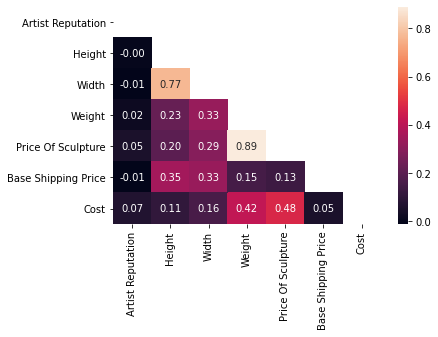

In [29]:
# correlation heatmap for all features
corr = train_data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, annot=True,fmt=".2f")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


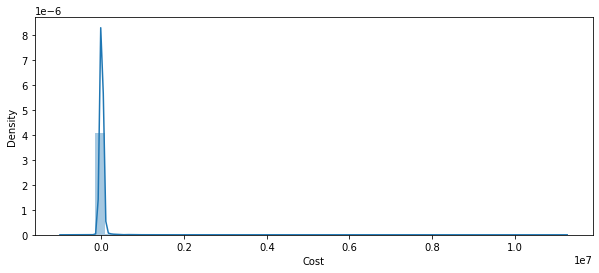

In [30]:
# plot sample skewed feature
plt.figure(figsize=(10,4))
sns.distplot(train_data['Cost'])
plt.show()

## Skewed Features in descending order

In [31]:
skewed_features = cont_features.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features

Cost                   29.817459
Price Of Sculpture     22.206823
Weight                 21.556174
Width                   1.546702
Base Shipping Price     0.918102
Height                  0.594041
Artist Reputation       0.141363
dtype: float64

In [42]:
train_data.isnull().sum()[train_data.isnull().sum() > 0].to_dict()

{'Artist Reputation': 750,
 'Height': 375,
 'Material': 764,
 'Remote Location': 771,
 'Transport': 1392,
 'Weight': 587,
 'Width': 584}

In [46]:
k = train_data.isnull().sum()[train_data.isnull().sum() > 0].to_dict().keys()
v = train_data.isnull().sum()[train_data.isnull().sum() > 0].to_dict().values()

In [47]:
missing = pd.DataFrame({'Atrribute':k,'Count':v})

In [50]:
missing['Percent'] = missing['Count']/len(train_data)

In [55]:
missing= missing.sort_values(by='Percent',ascending=False)

In [58]:
missing.reset_index(inplace=True)

In [66]:
missing.drop('index',axis=1,inplace=True)

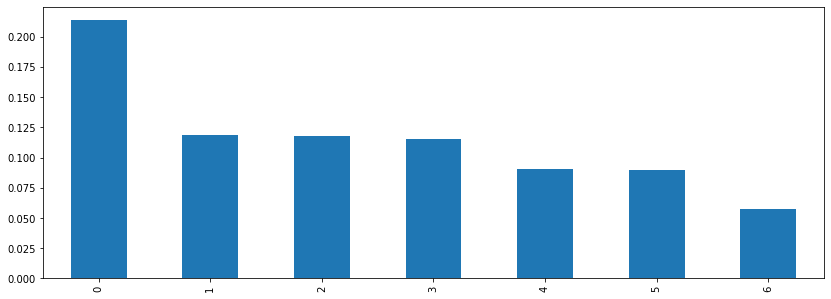

In [67]:
missing['Percent'].plot(kind='bar',figsize=(14,5),)

In [68]:
train_data.shape

(6500, 18)

In [69]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Artist Reputation     750
Height                375
Width                 584
Weight                587
Material              764
Transport            1392
Remote Location       771
dtype: int64

In [70]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Artist Reputation    222
Height               119
Width                141
Weight               149
Transport            232
dtype: int64

In [71]:
def fillNan(df, col, value):
    df[col].fillna(value, inplace=True)

In [73]:
fillNan(train_data, 'Artist Reputation', train_data['Artist Reputation'].median())
fillNan(test_data ,'Artist Reputation', train_data['Artist Reputation'].median())
train_data['Artist Reputation'].isna().any()

False

In [75]:
fillNan(train_data, 'Height', train_data['Height'].median())
fillNan(test_data, 'Height', train_data['Height'].median())
train_data['Height'].isna().any()

False

In [79]:
fillNan(train_data, 'Weight', train_data['Weight'].median())
fillNan(test_data, 'Weight', train_data['Weight'].median())
train_data['Weight'].isna().any()

False

In [82]:
fillNan(train_data, 'Width', train_data['Width'].median())
fillNan(test_data, 'Width', train_data['Width'].median())
train_data['Width'].isna().any()

False

In [80]:
fillNan(train_data, 'Transport', train_data['Transport'].mode()[0])
fillNan(test_data, 'Transport', train_data['Transport'].mode()[0])
train_data['Transport'].isna().any()

False

In [86]:
fillNan(train_data, 'Material', train_data['Material'].mode()[0])
fillNan(test_data, 'Material', train_data['Material'].mode()[0])
train_data['Material'].isna().any()

False

In [87]:
fillNan(train_data, 'Remote Location', train_data['Remote Location'].mode()[0])
fillNan(test_data, 'Remote Location', train_data['Remote Location'].mode()[0])
train_data['Remote Location'].isna().any()

False

In [88]:
train_data.isnull().sum()[train_data.isnull().sum() > 0]

Series([], dtype: int64)

In [89]:
test_data.isnull().sum()[test_data.isnull().sum() > 0]

Series([], dtype: int64)

## Derived Features

In [90]:
# score addition
train_data['state'] = train_data['Customer Location'].map(lambda x:x.split()[-2])
train_data.drop('Customer Location', inplace=True, axis=1)
test_data['state'] = test_data['Customer Location'].map(lambda x:x.split()[-2])
test_data.drop('Customer Location', inplace=True, axis=1)
test_data.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,state
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,Wood,5.98,19.11,Yes,Yes,No,Airways,No,Working Class,No,2017-07-03,2017-07-06,IA
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,Clay,6.92,13.96,No,No,No,Roadways,Yes,Working Class,No,2016-05-02,2016-05-02,OH
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,Aluminium,4.23,13.62,Yes,No,No,Airways,No,Working Class,No,2018-01-04,2018-01-06,AP
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,Clay,6.28,23.79,No,Yes,No,Roadways,Yes,Wealthy,No,2017-09-14,2017-09-17,AL
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,Marble,4.39,17.83,No,Yes,Yes,Roadways,No,Working Class,Yes,2017-12-03,2017-12-02,LA


In [91]:
train_data['dday'] = train_data['Delivery Date'].dt.day
train_data['dmonth'] = train_data['Delivery Date'].dt.month
train_data['dyear'] = train_data['Delivery Date'].dt.year
train_data['ddayofweek'] = train_data['Delivery Date'].dt.dayofweek
#
test_data['dday'] = test_data['Delivery Date'].dt.day
test_data['dmonth'] = test_data['Delivery Date'].dt.month
test_data['dyear'] = test_data['Delivery Date'].dt.year
test_data['ddayofweek'] = test_data['Delivery Date'].dt.dayofweek

In [92]:
train_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,state,dday,dmonth,dyear,ddayofweek
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,-283.29,OH,3,6,2015,2
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,-159.96,WY,5,3,2017,6
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,-154.29,WA,8,3,2015,6
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,2015-05-24,2015-05-20,-161.16,KY,20,5,2015,2
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,-159.23,PA,14,12,2016,2


In [100]:
train_data['scheduleDiff'] = (train_data['Delivery Date'] - train_data['Scheduled Date']).dt.days

In [95]:
test_data['scheduleDiff'] = (test_data['Delivery Date'] - train_data['Scheduled Date']).dt.days

In [101]:
train_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,state,dday,dmonth,dyear,ddayofweek,scheduleDiff
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,2015-06-07,2015-06-03,-283.29,OH,3,6,2015,2,-4
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,2017-03-06,2017-03-05,-159.96,WY,5,3,2017,6,-1
2,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,2015-03-09,2015-03-08,-154.29,WA,8,3,2015,6,-1
3,0.12,9.0,8.0,3102.0,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,2015-05-24,2015-05-20,-161.16,KY,20,5,2015,2,-4
4,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,2016-12-18,2016-12-14,-159.23,PA,14,12,2016,2,-4


In [103]:
cont_features, cat_features = divideFeatures(train_data)
cat_features

,Material,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,state
0,Brass,Yes,Yes,No,Airways,No,Working Class,No,OH
1,Brass,No,No,No,Roadways,No,Working Class,No,WY
2,Clay,No,No,No,Roadways,Yes,Working Class,Yes,WA
3,Aluminium,No,No,No,Roadways,No,Wealthy,Yes,KY
4,Aluminium,Yes,Yes,Yes,Airways,No,Working Class,No,PA
...,...,...,...,...,...,...,...,...,...
6495,Brass,Yes,Yes,No,Airways,No,Wealthy,Yes,VT
6496,Brass,No,No,No,Roadways,No,Working Class,No,VA
6497,Clay,Yes,No,No,Roadways,Yes,Wealthy,No,MA
6498,Stone,No,Yes,No,Roadways,No,Working Class,Yes,UT


In [104]:
# label encoding
def mapFeature(data, f, data_test=None):
    feat = data[f].unique()
    feat_idx = [x for x in range(len(feat))]

    data[f].replace(feat, feat_idx, inplace=True)
    if data_test is not None:
        data_test[f].replace(feat, feat_idx, inplace=True)

In [105]:
for col in cat_features.columns:
    mapFeature(train_data, col, test_data)


In [106]:
train_data.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Cost,state,dday,dmonth,dyear,ddayofweek,scheduleDiff
0,0.26,17.0,6.0,4128.0,0,13.91,16.27,0,0,0,0,0,0,0,2015-06-07,2015-06-03,-283.29,0,3,6,2015,2,-4
1,0.28,3.0,3.0,61.0,0,6.83,15.00,1,1,0,1,0,0,0,2017-03-06,2017-03-05,-159.96,1,5,3,2017,6,-1
2,0.07,8.0,5.0,237.0,1,4.96,21.18,1,1,0,1,1,0,1,2015-03-09,2015-03-08,-154.29,2,8,3,2015,6,-1
3,0.12,9.0,8.0,3102.0,2,5.81,16.31,1,1,0,1,0,1,1,2015-05-24,2015-05-20,-161.16,3,20,5,2015,2,-4
4,0.15,17.0,6.0,324.0,2,3.18,11.94,0,0,1,0,0,0,0,2016-12-18,2016-12-14,-159.23,4,14,12,2016,2,-4


In [107]:
test_data.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,state,dday,dmonth,dyear,ddayofweek,scheduleDiff
0,fffe3400310033003300,James Miller,0.35,53.0,18.0,871.0,3,5.98,19.11,0,0,0,0,0,0,0,2017-07-03,2017-07-06,20,6,7,2017,3,760.0
1,fffe3600350035003400,Karen Vetrano,0.67,7.0,4.0,108.0,1,6.92,13.96,1,1,0,1,1,0,0,2016-05-02,2016-05-02,0,2,5,2016,0,-308.0
2,fffe3700360030003500,Roseanne Gaona,0.61,6.0,5.0,97.0,2,4.23,13.62,0,1,0,0,0,0,0,2018-01-04,2018-01-06,18,6,1,2018,5,1034.0
3,fffe350038003600,Todd Almanza,0.14,15.0,8.0,757.0,1,6.28,23.79,1,0,0,1,1,1,0,2017-09-14,2017-09-17,5,17,9,2017,6,847.0
4,fffe3500390032003500,Francis Rivero,0.63,10.0,4.0,1673.0,4,4.39,17.83,1,0,1,1,0,0,1,2017-12-03,2017-12-02,28,2,12,2017,5,349.0


In [108]:
train_data.drop(['Scheduled Date','Delivery Date'],axis=1,inplace=True)
test_data.drop(['Scheduled Date','Delivery Date'],axis=1,inplace=True)

In [112]:
def log1p(vec):
    return np.log1p(abs(vec))

def expm1(x):
    return np.expm1(x)

def clipExp(vec):
    return np.clip(expm1(vec), 0, None)

def getRmse(y_train, y_train_pred):
    print(skm.mean_squared_error(y_train, y_train_pred))

In [113]:
# apply log on target feature with abs as it has many negative values
train_data['Cost']= log1p(train_data['Cost'])
train_data['Cost'].min()

1.6986774106710587

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


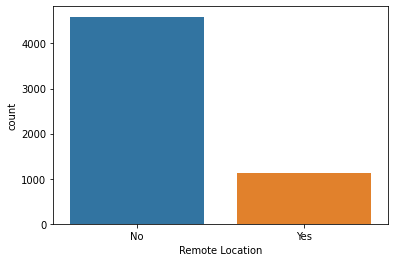

In [ ]:
sns.countplot(train_data['Remote Location'])

In [15]:
train_data['Remote Location'].value_counts(dropna=False)

No     4594
Yes    1135
NaN     771
Name: Remote Location, dtype: int64

In [125]:
train_new = train_data.copy()
test_new = test_data.copy()

In [126]:
train_data.columns

Index(['Customer Id', 'Artist Name', 'Artist Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price Of Sculpture', 'Base Shipping Price',
       'International', 'Express Shipment', 'Installation Included',
       'Transport', 'Fragile', 'Customer Information', 'Remote Location',
       'Scheduled Date', 'Delivery Date', 'Customer Location', 'Cost',
       'Delivery_Days', 'On_Time_Delivery', 'Delivery_Year', 'Delivery_Month'],
      dtype='object')

In [127]:
train_new.drop(['Delivery Date','Scheduled Date'],axis=1,inplace=True)
test_new.drop(['Delivery Date','Scheduled Date'],axis=1,inplace=True)

In [128]:
train_new.drop('Customer Id',axis=1,inplace=True)
test_new.drop('Customer Id',axis=1,inplace=True)

In [129]:
cat_cols  = [ col for col in train_new.columns if train_new[col].dtypes == 'O']
cat_cols

['Artist Name',
 'Material',
 'International',
 'Express Shipment',
 'Installation Included',
 'Transport',
 'Fragile',
 'Customer Information',
 'Remote Location',
 'Customer Location',
 'Delivery_Year',
 'Delivery_Month']

In [125]:
train_data.isnull().sum()

Artist Reputation          0
Height                     0
Width                      0
Weight                     0
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                  0
Fragile                    0
Customer Information       0
Remote Location            0
Cost                     659
state                      0
dday                       0
dmonth                     0
dyear                      0
ddayofweek                 0
scheduleDiff               0
dtype: int64

In [22]:
train_data['Customer Information'].value_counts(dropna=False)

Working Class    4803
Wealthy          1697
Name: Customer Information, dtype: int64

In [115]:
!pip install catboost

     |████████████████████████████████| 65.8MB 80kB/s 


In [116]:
from catboost import CatBoostRegressor
from sklearn.metrics import *
from sklearn.model_selection import *

In [118]:
train_data['Cost'].describe()

count    5841.000000
mean        2.008258
std         0.192884
min         1.698677
25%         1.861479
50%         1.964970
75%         2.107873
max         2.846441
Name: Cost, dtype: float64

In [120]:
X = train_data.drop('Cost',axis=1)
Y = train_data['Cost']
#Y = normalized

In [39]:
from sklearn.model_selection import GridSearchCV
gridParams = {
    'learning_rate': [0.0007,0.005, 0.001,0.01],
    'n_estimators': [500,1000,2000],
    'random_state' : [42,500,720]
    }
catboost = CatBoostRegressor()
grid = GridSearchCV(catboost, gridParams, verbose=2, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, Y,cat_features = cat_cols)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 25.1min finished


0:	learn: 240602.0819067	total: 56.6ms	remaining: 1m 53s
1:	learn: 240562.6410510	total: 65.6ms	remaining: 1m 5s
2:	learn: 240531.8400182	total: 73.4ms	remaining: 48.9s
3:	learn: 240498.0957240	total: 80.3ms	remaining: 40.1s
4:	learn: 240465.1136139	total: 88.2ms	remaining: 35.2s
5:	learn: 240420.3181395	total: 95.9ms	remaining: 31.9s
6:	learn: 240375.7419484	total: 103ms	remaining: 29.5s
7:	learn: 240340.8701732	total: 112ms	remaining: 27.8s
8:	learn: 240295.4256306	total: 119ms	remaining: 26.4s
9:	learn: 240258.1172481	total: 130ms	remaining: 25.8s
10:	learn: 240215.7116246	total: 142ms	remaining: 25.6s
11:	learn: 240179.2648631	total: 151ms	remaining: 25s
12:	learn: 240135.9603789	total: 159ms	remaining: 24.3s
13:	learn: 240099.7762760	total: 169ms	remaining: 23.9s
14:	learn: 240055.9464012	total: 176ms	remaining: 23.2s
15:	learn: 240021.3617444	total: 183ms	remaining: 22.7s
16:	learn: 239988.1965395	total: 191ms	remaining: 22.3s
17:	learn: 239954.6210349	total: 198ms	remaining: 21.

Streaming output truncated to the last 5000 lines.
4:	learn: 279858.7859436	total: 28.4ms	remaining: 28.4s
5:	learn: 279809.4856814	total: 33.8ms	remaining: 28.1s
6:	learn: 279774.1749094	total: 41ms	remaining: 29.3s
7:	learn: 279738.8213980	total: 49.3ms	remaining: 30.8s
8:	learn: 279703.6214039	total: 53.6ms	remaining: 29.7s
9:	learn: 279660.7235072	total: 59.6ms	remaining: 29.7s
10:	learn: 279630.3302820	total: 64.6ms	remaining: 29.3s
11:	learn: 279600.2970653	total: 70.6ms	remaining: 29.4s
12:	learn: 279552.4962847	total: 76.2ms	remaining: 29.2s
13:	learn: 279522.5763829	total: 80.6ms	remaining: 28.7s
14:	learn: 279490.9737212	total: 85.9ms	remaining: 28.5s
15:	learn: 279449.3796595	total: 89.9ms	remaining: 28s
16:	learn: 279422.0379171	total: 95.3ms	remaining: 27.9s
17:	learn: 279386.4603608	total: 101ms	remaining: 27.9s
18:	learn: 279356.1018231	total: 106ms	remaining: 27.8s
19:	learn: 279320.9422241	total: 111ms	remaining: 27.6s
20:	learn: 279296.8821344	total: 116ms	remaining: 

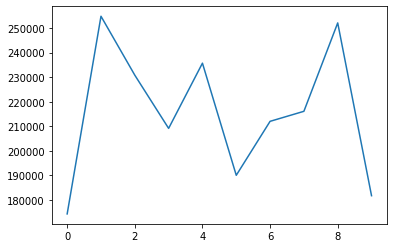

In [80]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.model_selection import KFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostRegressor(learning_rate =0.0007, n_estimators =5000, random_state = 720)    

        model.fit(xtrain,ytrain,cat_features = cat_cols)
            
        preds = model.predict(xtest)
        
        print(np.sqrt(mean_squared_error(ytest,preds)))
        scores.append(np.sqrt(mean_squared_error(ytest,preds)))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

In [121]:
def rmsle(y, y0):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

In [123]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.model_selection import KFold
iterations = 5
scores = []
scores_val = []
target = Y
temp = X
predictions = []
for i in range(iterations):
    print(f'Running {i+1} iteration')
    
    kfold = KFold(n_splits = 2, shuffle=True)
    
    for train_index,test_index in kfold.split(temp,target):
        xtrain,xtest = temp[temp.index.isin(train_index)],temp[temp.index.isin(test_index)]
        ytrain,ytest = target[train_index],target[test_index]
        
        model  = CatBoostRegressor(learning_rate =0.0007, n_estimators =5000, random_state = 42)    

        model.fit(xtrain,ytrain)
            
        preds = model.predict(xtest)
        
        print(rmsle(ytest, preds))
        scores.append(rmsle(ytest, preds))
        #
#
#        
print('-----------KFOLD--------------')
print(sns.lineplot(x=[i for i in range(len(scores))],y=scores))
print(min(scores),max(scores),np.mean(scores))

Running 1 iteration


CatBoostError: ignored

In [142]:
predictions = grid.best_estimator_.predict(test_new)

In [143]:
predictions.min()

4626.177316753814

In [144]:
predictions = model.predict(test_new)

In [145]:
predictions.min()

-946.8300099222834

In [146]:
predictions

array([ 1440.86950597,  2716.07085461,  2344.56965933, ...,
        6676.91169922,  2986.27195604, 52839.44370666])

In [147]:
df = pd.DataFrame()
df['Customer Id'] = test_data['Customer Id']
df['Cost'] = predictions
df['Cost'] = df['Cost'].abs()

In [148]:
df.head()

,Customer Id,Cost
0,fffe3400310033003300,1440.869506
1,fffe3600350035003400,2716.070855
2,fffe3700360030003500,2344.569659
3,fffe350038003600,2132.676397
4,fffe3500390032003500,8030.132575


In [149]:
df.to_csv("sub1.csv",index=False)